In [181]:
from fastai2.vision.all import *
import cv2
matplotlib.rcParams['image.cmap'] = 'bone'

In [182]:
path = Path('D:/Datasets/TN_SC')
images = path/'image'
masks = path/'mask'
get_msk = lambda o: path/'mask'/f'{o.stem}{o.suffix}'
get_msks = lambda o: path/'mask/'
labs = pd.read_csv(path/'train.csv')
get_labs = lambda o: path/'train.csv'/f'{ID.stem}'

In [183]:
def get_segment_crop(img,tol=0, mask=None):
    if mask is None:
        mask = img > tol
    return img[np.ix_(mask.any(1), mask.any(0))]

In [184]:
imgs = get_image_files(images)
msks = get_image_files(masks)
imgs, msks

((#3644) [Path('D:/Datasets/TN_SC/image/100.PNG'),Path('D:/Datasets/TN_SC/image/1002.PNG'),Path('D:/Datasets/TN_SC/image/1004.PNG'),Path('D:/Datasets/TN_SC/image/1010.PNG'),Path('D:/Datasets/TN_SC/image/1012.PNG'),Path('D:/Datasets/TN_SC/image/102.PNG'),Path('D:/Datasets/TN_SC/image/1020.PNG'),Path('D:/Datasets/TN_SC/image/1024.PNG'),Path('D:/Datasets/TN_SC/image/1026.PNG'),Path('D:/Datasets/TN_SC/image/1029.PNG')...],
 (#3644) [Path('D:/Datasets/TN_SC/mask/100.PNG'),Path('D:/Datasets/TN_SC/mask/1002.PNG'),Path('D:/Datasets/TN_SC/mask/1004.PNG'),Path('D:/Datasets/TN_SC/mask/1010.PNG'),Path('D:/Datasets/TN_SC/mask/1012.PNG'),Path('D:/Datasets/TN_SC/mask/102.PNG'),Path('D:/Datasets/TN_SC/mask/1020.PNG'),Path('D:/Datasets/TN_SC/mask/1024.PNG'),Path('D:/Datasets/TN_SC/mask/1026.PNG'),Path('D:/Datasets/TN_SC/mask/1029.PNG')...])

In [185]:
def get_segments(image, mask):
    """view image, mask and seperate mask segment"""
    img = Image.open(image); ten_img = TensorImage(img)
    msk = Image.open(mask); ten_mask = TensorImage(msk)
    seg_img = str(image); seg_mask = str(mask)
    path_img = seg_img.split(os.sep)[-1]
    path_msk = seg_mask.split(os.sep)[-1]
    
    seg_im = cv2.imread(seg_img); seg_msk = cv2.imread(seg_mask, 0)
    
    rt = get_segment_crop(seg_im, mask=seg_msk)
    rtt = TensorImage(rt)   

    _,axs = subplots(1,3, figsize=(15,15))
    show_image(ten_img, ctx=axs[0], title=f'image {path_img}')
    show_image(ten_mask, ctx=axs[1], title=f'mask {path_msk}')
    show_image(rtt, ctx=axs[2], title='segment')

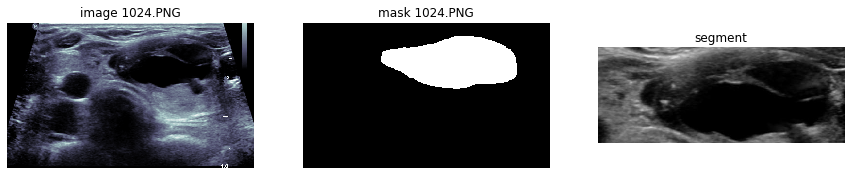

In [186]:
get_segments(imgs[7], msks[7])